# **ALTERNATE METHOD - 2** #

In [1]:

# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
stock_data = pd.read_csv('stock_data.csv')

In [3]:
stocks_data = stock_data[['DATE', 'STOCK_PRICE']]
stocks_data

,DATE,STOCK_PRICE
0,2000-01-03,122.480469
1,2000-01-04,132.110931
2,2000-01-05,121.542191
3,2000-01-06,111.819138
4,2000-01-07,102.873825
...,...,...
5917,2023-11-10,1368.699951
5918,2023-11-13,1374.150024
5919,2023-11-15,1411.150024
5920,2023-11-16,1443.900024


In [4]:
#Defining test and train data sizes
#train_size = int(len(stocks_data)*0.80)
train_size = int(len(stocks_data)*0.95)
test_size = len(stocks_data) - train_size

In [5]:
train_size,test_size

(5625, 297)

In [6]:
st_data = stock_data[['DATE','STOCK_PRICE']]
st_data

,DATE,STOCK_PRICE
0,2000-01-03,122.480469
1,2000-01-04,132.110931
2,2000-01-05,121.542191
3,2000-01-06,111.819138
4,2000-01-07,102.873825
...,...,...
5917,2023-11-10,1368.699951
5918,2023-11-13,1374.150024
5919,2023-11-15,1411.150024
5920,2023-11-16,1443.900024


In [7]:
for index, row in st_data.iterrows():
    if (index <= train_size):
        st_data.at[index, 'Indicator'] = 'train'
    elif (index > train_size):
        st_data.at[index, 'Indicator'] = 'test'
    else:
        print("ERROR HAS OCCURED\n")
st_data

,DATE,STOCK_PRICE,Indicator
0,2000-01-03,122.480469,train
1,2000-01-04,132.110931,train
2,2000-01-05,121.542191,train
3,2000-01-06,111.819138,train
4,2000-01-07,102.873825,train
...,...,...,...
5917,2023-11-10,1368.699951,test
5918,2023-11-13,1374.150024,test
5919,2023-11-15,1411.150024,test
5920,2023-11-16,1443.900024,test


In [8]:
ctest_data, ctrain_data = st_data.STOCK_PRICE[st_data["Indicator"].eq("test")], st_data[st_data["Indicator"].eq("train")] # The command to extract test and train data based on the 'indicator' column
ctest_data.values

array([1606.75     , 1582.699951 , 1597.400024 , 1575.449951 ,
       1542.550049 , 1537.300049 , 1518.849976 , 1521.849976 ,
       1462.       , 1493.199951 , 1464.400024 , 1452.900024 ,
       1460.849976 , 1455.349976 , 1457.800049 , 1475.949951 ,
       1511.849976 , 1535.599976 , 1545.       , 1475.       ,
       1432.050049 , 1379.150024 , 1390.300049 , 1388.349976 ,
       1376.550049 , 1367.800049 , 1365.25     , 1379.75     ,
       1392.199951 , 1394.449951 , 1397.550049 , 1413.099976 ,
       1394.       , 1429.800049 , 1454.949951 , 1451.75     ,
       1462.699951 , 1423.900024 , 1428.849976 , 1419.75     ,
       1474.050049 , 1490.199951 , 1503.550049 , 1485.       ,
       1500.300049 , 1500.099976 , 1517.400024 , 1525.75     ,
       1522.599976 , 1512.599976 , 1537.900024 , 1572.75     ,
       1552.449951 , 1530.5      , 1513.900024 , 1507.050049 ,
       1510.25     , 1502.25     , 1570.050049 , 1584.       ,
       1593.699951 , 1602.199951 , 1586.849976 , 1592.9

In [9]:
sdata_c = st_data.copy()
sdata_c['DATE'] = pd.to_datetime(sdata_c['DATE'], format = '%Y-%m-%d')
sdata_c.set_index('DATE',inplace=True)
sdata_c

,STOCK_PRICE,Indicator
DATE,,
2000-01-03,122.480469,train
2000-01-04,132.110931,train
2000-01-05,121.542191,train
2000-01-06,111.819138,train
2000-01-07,102.873825,train
...,...,...
2023-11-10,1368.699951,test
2023-11-13,1374.150024,test
2023-11-15,1411.150024,test


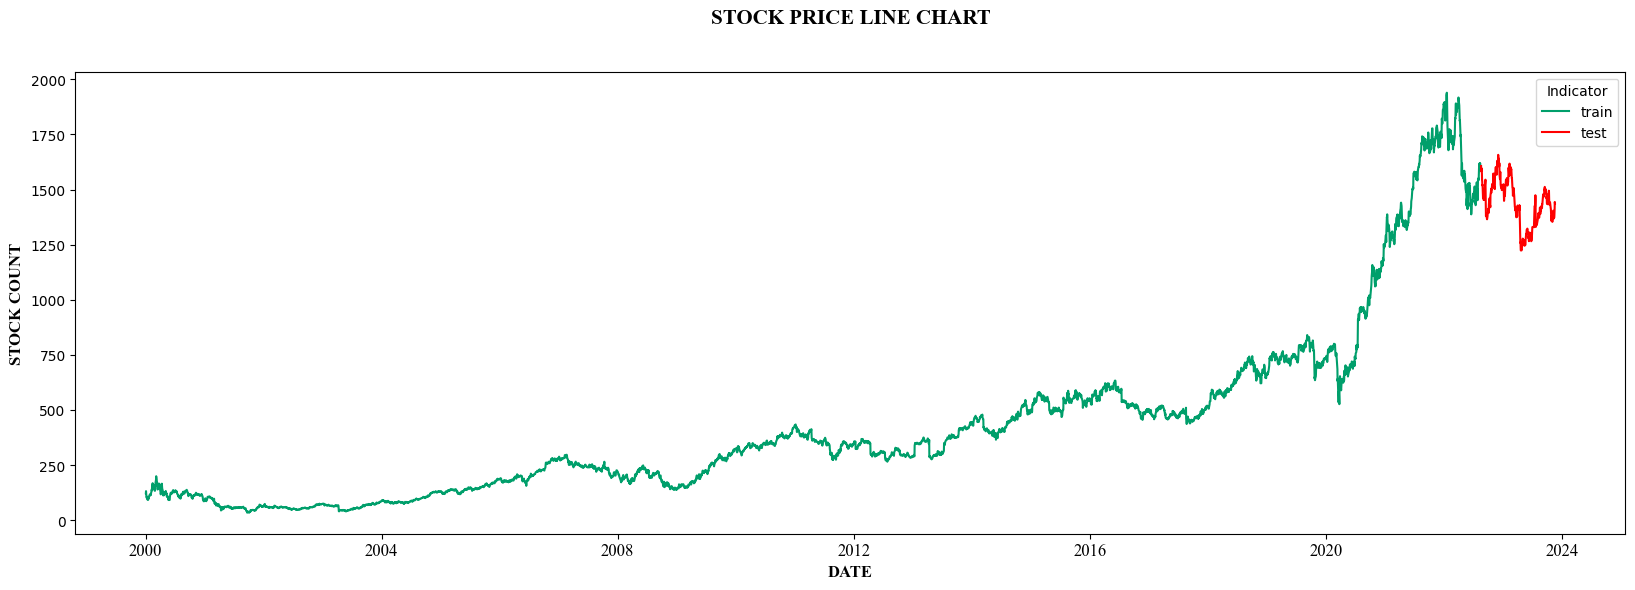

In [10]:
plt.figure(figsize=(20,6))
sns.lineplot(x='DATE', y='STOCK_PRICE', hue='Indicator', palette=['#009f6b','#FF0000'], data=sdata_c)
plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
plt.xlabel("DATE", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("STOCK COUNT", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title("STOCK PRICE LINE CHART\n\n", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '15')
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
close = sdata_c['STOCK_PRICE']

ds = close.values
ds

array([ 122.480469,  132.110931,  121.542191, ..., 1411.150024,
       1443.900024, 1437.650024])

In [12]:
ds

array([ 122.480469,  132.110931,  121.542191, ..., 1411.150024,
       1443.900024, 1437.650024])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sdata_sc = sdata_c.copy()
sdata_sc[['STOCK_PRICE']] = scaler.fit_transform(sdata_sc[['STOCK_PRICE']])
sdata_sc.head()

,STOCK_PRICE,Indicator
DATE,,
2000-01-03,0.046267,train
2000-01-04,0.051323,train
2000-01-05,0.045775,train
2000-01-06,0.040671,train
2000-01-07,0.035975,train


In [14]:
ds_scaled = sdata_sc['STOCK_PRICE'].values

In [15]:
ds_scaled

array([0.04626741, 0.05132274, 0.04577488, ..., 0.72273104, 0.73992256,
       0.73664174])

In [16]:
ds_scaled = ds_scaled.reshape(-1,1)
ds_scaled

array([[0.04626741],
       [0.05132274],
       [0.04577488],
       ...,
       [0.72273104],
       [0.73992256],
       [0.73664174]])

In [17]:
len(ds_scaled), len(ds)

(5922, 5922)

In [18]:
# from sklearn.preprocessing import MinMaxScaler

# #Using MinMaxScaler for normalizing data between 0 & 1
# normalizer = MinMaxScaler(feature_range=(0,1))
# ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [19]:
# len(ds_scaled), len(ds)

In [20]:
ds_scaled.shape

(5922, 1)

In [21]:
sdata_sc

,STOCK_PRICE,Indicator
DATE,,
2000-01-03,0.046267,train
2000-01-04,0.051323,train
2000-01-05,0.045775,train
2000-01-06,0.040671,train
2000-01-07,0.035975,train
...,...,...
2023-11-10,0.700448,test
2023-11-13,0.703309,test
2023-11-15,0.722731,test


In [22]:
ds_train = sdata_sc[sdata_sc["Indicator"].eq("train")].STOCK_PRICE.values
ds_test = sdata_sc[sdata_sc["Indicator"].eq("test")].STOCK_PRICE.values

ds_train, ds_test

(array([0.04626741, 0.05132274, 0.04577488, ..., 0.83220553, 0.81897728,
        0.81965972]),
 array([0.82540769, 0.81278306, 0.82049959, 0.8089773 , 0.7917071 ,
        0.78895121, 0.77926618, 0.78084097, 0.74942381, 0.76580166,
        0.75068366, 0.74464695, 0.74882013, 0.74593301, 0.74721913,
        0.75674659, 0.77559165, 0.78805878, 0.79299315, 0.75624793,
        0.73370213, 0.70593323, 0.71178623, 0.71076257, 0.70456842,
        0.69997526, 0.69863666, 0.70624817, 0.71278355, 0.71396465,
        0.71559199, 0.72375464, 0.71372845, 0.73252104, 0.74572302,
        0.74404326, 0.74979124, 0.72942393, 0.73202231, 0.72724545,
        0.75574927, 0.76422687, 0.77123476, 0.76149725, 0.76952873,
        0.7694237 , 0.77850505, 0.78288822, 0.78123467, 0.77598535,
        0.78926615, 0.80756001, 0.79690387, 0.78538164, 0.77666779,
        0.77307202, 0.77475177, 0.77055232, 0.80614272, 0.8134655 ,
        0.81855731, 0.82301923, 0.81496154, 0.8181374 , 0.80464661,
        0.81430537, 0

In [23]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [24]:
len(ds_train),len(ds_test)

(5625, 297)

In [25]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [26]:
# Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [27]:
X_train.shape, y_train.shape

((5524, 100), (5524,))

In [28]:
X_train

array([[0.04626741, 0.05132274, 0.04577488, ..., 0.0314143 , 0.03110385,
        0.03016922],
       [0.05132274, 0.04577488, 0.04067094, ..., 0.03110385, 0.03016922,
        0.03336352],
       [0.04577488, 0.04067094, 0.03597526, ..., 0.03016922, 0.03336352,
        0.03930591],
       ...,
       [0.9745146 , 0.94740186, 0.97338598, ..., 0.80357054, 0.82168069,
        0.83055205],
       [0.94740186, 0.97338598, 0.95540707, ..., 0.82168069, 0.83055205,
        0.83189059],
       [0.97338598, 0.95540707, 0.95446217, ..., 0.83055205, 0.83189059,
        0.82259932]])

In [29]:
y_train

array([0.03336352, 0.03930591, 0.04029108, ..., 0.83189059, 0.82259932,
       0.83220553])

In [30]:
X_test.shape, y_test.shape

((196, 100), (196,))

In [31]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
X_train.shape

(5524, 100, 1)

In [33]:
X_train.shape[0]

5524

In [34]:
X_train.shape[1]

100

In [35]:
X_train

array([[[0.04626741],
        [0.05132274],
        [0.04577488],
        ...,
        [0.0314143 ],
        [0.03110385],
        [0.03016922]],

       [[0.05132274],
        [0.04577488],
        [0.04067094],
        ...,
        [0.03110385],
        [0.03016922],
        [0.03336352]],

       [[0.04577488],
        [0.04067094],
        [0.03597526],
        ...,
        [0.03016922],
        [0.03336352],
        [0.03930591]],

       ...,

       [[0.9745146 ],
        [0.94740186],
        [0.97338598],
        ...,
        [0.80357054],
        [0.82168069],
        [0.83055205]],

       [[0.94740186],
        [0.97338598],
        [0.95540707],
        ...,
        [0.82168069],
        [0.83055205],
        [0.83189059]],

       [[0.97338598],
        [0.95540707],
        [0.95446217],
        ...,
        [0.83055205],
        [0.83189059],
        [0.82259932]]])

In [36]:
X_train.shape

(5524, 100, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
#Creating LSTM model using keras
lstm_model = Sequential()
lstm_model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=100,return_sequences=True))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dense(units=1,activation='linear'))
lstm_model.summary()

#Training model with adam optimizer and mean squared error loss function
lstm_model.compile(loss='mean_squared_error',optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201701 (787.89 KB)
Trainable params: 201701 (787.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [39]:
#model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,batch_size=64)

In [40]:
#model.save('C://Users/Office/mypy_3.10/Project/model_epoch_95pc_100sam_500e.h5')
#np.save('my_history_95pc_100sam_500e.npy',model.history)

In [41]:
from keras.models import load_model
lstm_model = load_model("C://Users/Office/mypy_3.10/Project/model_epoch_90pc_100sam_500e.h5")
lstm_model.history=np.load('C://Users/Office/mypy_3.10/Project/my_history_90pc_100sam_500e.npy',allow_pickle='TRUE').item()

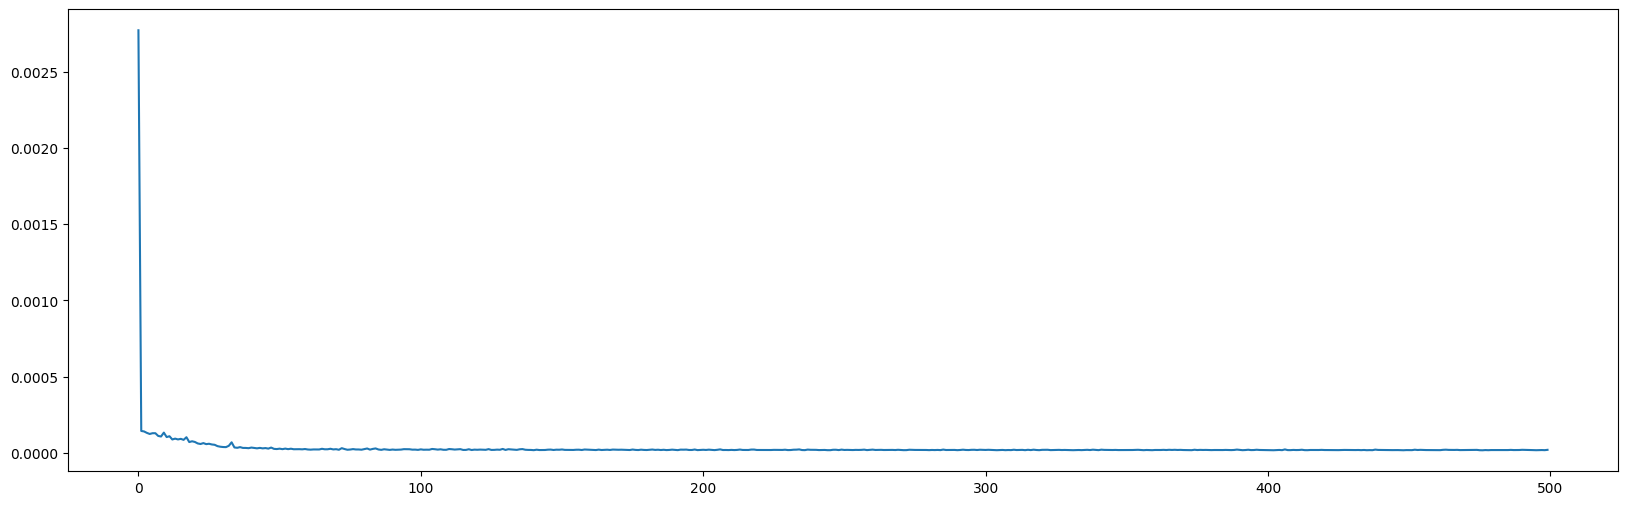

In [42]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = lstm_model.history.history['loss']
plt.figure(figsize=(20,6))
plt.plot(loss)
plt.show()

In [43]:
ctest_data = sdata_c.STOCK_PRICE[sdata_c["Indicator"].eq("test")]
ctrain_data = sdata_c.STOCK_PRICE[sdata_c["Indicator"].eq("train")] # The command to extract test and train data based on the 'indicator' column
ctest_data, ctrain_data

(DATE
 2022-08-17    1606.750000
 2022-08-18    1582.699951
 2022-08-19    1597.400024
 2022-08-22    1575.449951
 2022-08-23    1542.550049
                  ...     
 2023-11-10    1368.699951
 2023-11-13    1374.150024
 2023-11-15    1411.150024
 2023-11-16    1443.900024
 2023-11-17    1437.650024
 Name: STOCK_PRICE, Length: 296, dtype: float64,
 DATE
 2000-01-03     122.480469
 2000-01-04     132.110931
 2000-01-05     121.542191
 2000-01-06     111.819138
 2000-01-07     102.873825
                  ...     
 2022-08-08    1619.099976
 2022-08-10    1601.400024
 2022-08-11    1619.699951
 2022-08-12    1594.500000
 2022-08-16    1595.800049
 Name: STOCK_PRICE, Length: 5626, dtype: float64)

In [44]:
test = ctest_data[time_stamp:len(ctest_data)]
test_val = test.values

train = ctrain_data[time_stamp:len(ctrain_data)]
train_val = train.values

In [45]:
#Predicitng on train and test data
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

7/7 [==============================] - 0s 35ms/step


In [46]:
#Inverse transform to get actual value
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [47]:
len(test_val), len(test_predict)

(196, 196)

In [48]:
len(train_predict)

5524

In [49]:
def get_metrics(dataset, pred):
    rmse_val = np.round(np.sqrt(mean_squared_error(dataset, pred)),2)
    mape_val = np.round(mean_absolute_percentage_error(dataset, pred)*100,2)
    return rmse_val, mape_val

In [50]:
lstm_rmse, lstm_mape = get_metrics(test_val, test_predict)
print(f'LSTM - \nRoot Mean Squared Error (RMSE): {lstm_rmse}\nMean Absolute Percent Error (MAPE): {lstm_mape}\n')

LSTM - 
Root Mean Squared Error (RMSE): 36.39
Mean Absolute Percent Error (MAPE): 1.9



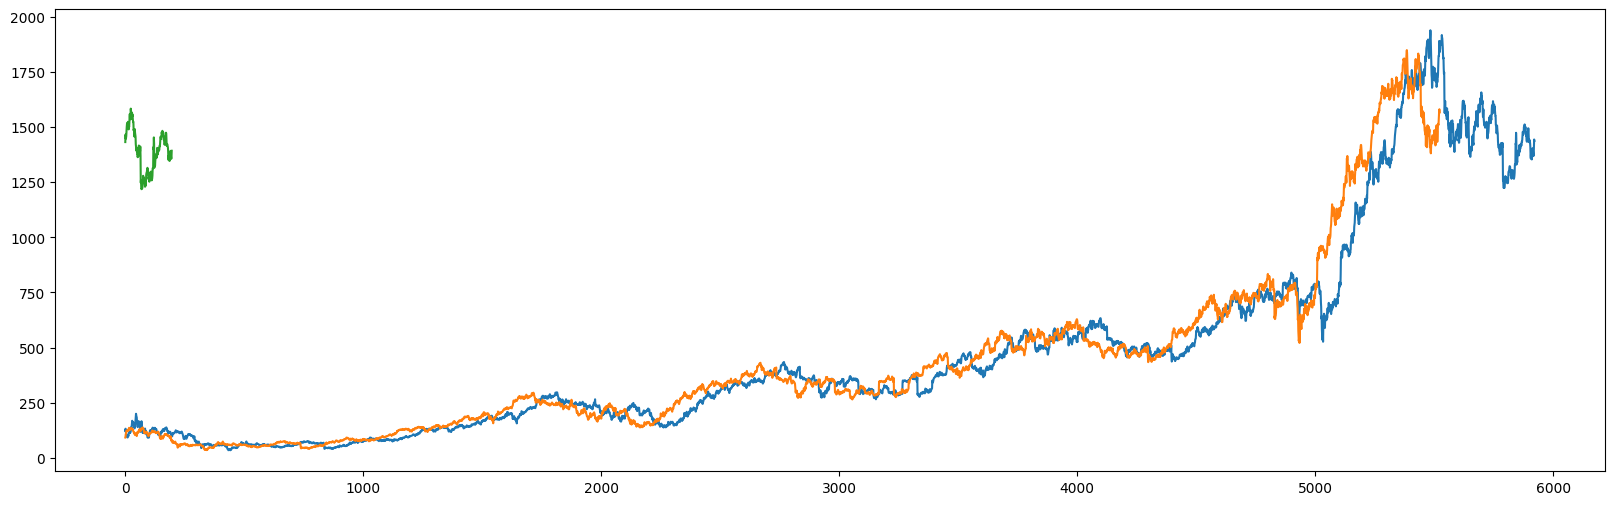

In [51]:
#Comparing using visuals
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [52]:
predict = np.vstack((train_predict,test_predict))
print(len(ds_scaled), len(predict))
len(ds_scaled) - len(predict)

5922 5720


202

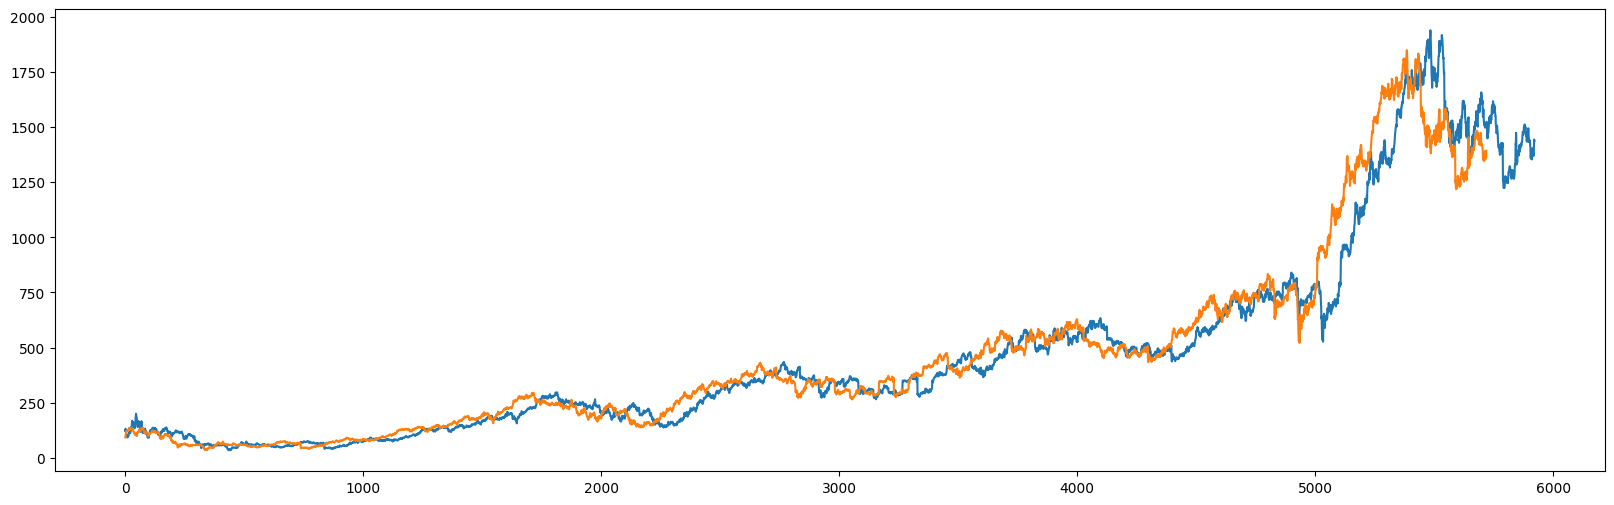

In [53]:
#Combining the predited data to create uniform data visualization
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(ds_scaled))
plt.plot(predict)

In [54]:
# plt.figure(figsize=(20,6))
# sns.lineplot(x='DATE', y='STOCK_PRICE', hue='Indicator', palette=['#009f6b','#FF0000'], data=sdata_c)
# plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
# plt.xlabel("DATE", weight='bold', fontfamily = "Times New Roman", size = '12')
# plt.ylabel("STOCK COUNT", weight='bold', fontfamily = "Times New Roman", size = '12')
# plt.title("STOCK PRICE LINE CHART\n\n", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '15')
# plt.show()

In [55]:
len(ds_test)

297

In [56]:
test_acquired_data = len(ds_test) - time_stamp
fut_inp = ds_test[test_acquired_data:] # The next 100 were missed, which needs to be extracted

In [57]:
fut_inp = fut_inp.reshape(1,-1)

In [58]:
fut_inp.shape

(1, 100)

In [59]:
tmp_inp = list(fut_inp)

In [60]:
tmp_inp

[array([0.65341377, 0.65861061, 0.6555135 , 0.64653718, 0.66013293,
        0.66719323, 0.66514599, 0.65742952, 0.66052663, 0.66189144,
        0.66603841, 0.66511978, 0.65525104, 0.64635347, 0.64884689,
        0.65333502, 0.66105156, 0.67998841, 0.6807365 , 0.67966036,
        0.73018505, 0.72882024, 0.75590671, 0.74252095, 0.6803428 ,
        0.68393857, 0.69002777, 0.68556585, 0.69868914, 0.70553953,
        0.71307229, 0.71181244, 0.71388596, 0.71118255, 0.70217995,
        0.71354474, 0.72658928, 0.72275725, 0.71097256, 0.71945022,
        0.71887281, 0.72091999, 0.72973887, 0.72766542, 0.7251982 ,
        0.72643178, 0.73527693, 0.7347782 , 0.73947638, 0.7508149 ,
        0.75819015, 0.75716656, 0.75152354, 0.75343956, 0.75695657,
        0.76979119, 0.76777016, 0.77291451, 0.77580164, 0.76469932,
        0.76412191, 0.77034233, 0.7672715 , 0.7561167 , 0.74840022,
        0.75233721, 0.73761285, 0.73527693, 0.73451574, 0.74063121,
        0.74966001, 0.75811146, 0.75603794, 0.76

In [61]:
tmp_inp = tmp_inp[0].tolist()

In [62]:
# Predicting next duration (configurable) days price using the current data
# It will predict in sliding window manner (algorithm) with stride 1

duration = 10
lst_output=[]
n_steps=100
i=0
while(i<duration):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7233899235725403], [0.7126705646514893], [0.7048243284225464], [0.6985471844673157], [0.6929922699928284], [0.6877676248550415], [0.6827631592750549], [0.6780000925064087], [0.6735321283340454], [0.6693990230560303]]


In [63]:
len(ds_scaled), len(lst_output)

(5922, 10)

In [64]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,(n_steps + 1))
plot_pred=np.arange(n_steps + 1,(n_steps + 1 + duration))

In [65]:
acquired_data = len(ds_scaled) - time_stamp

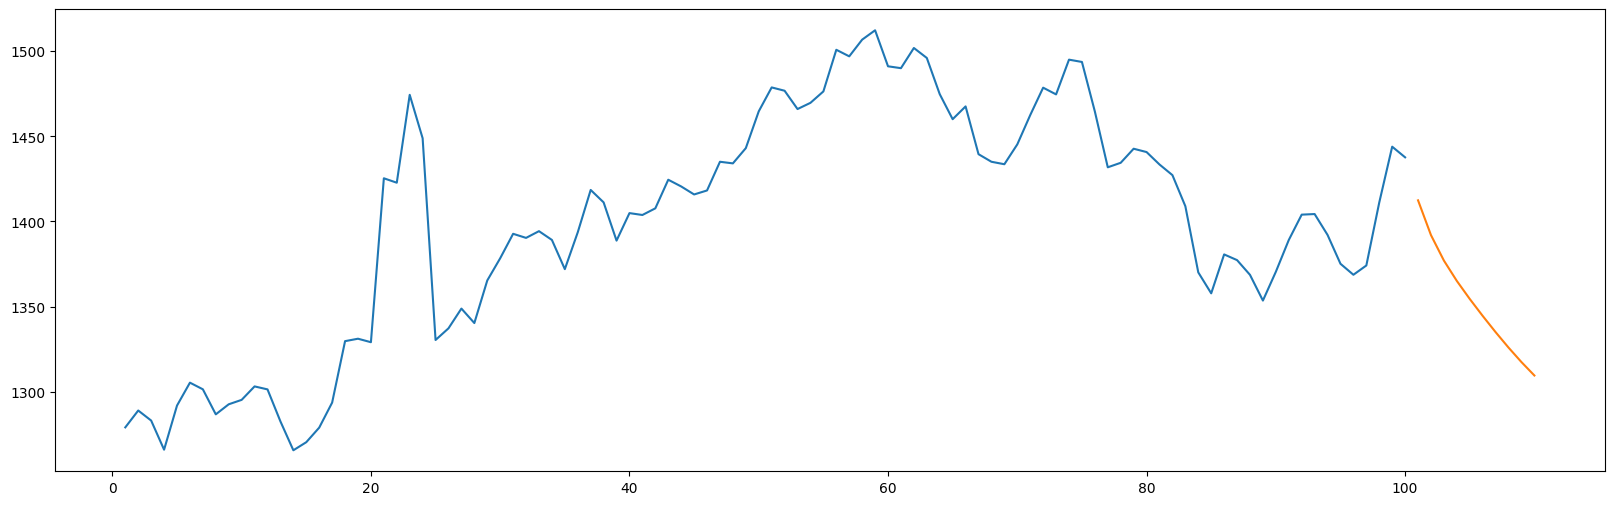

In [66]:
plt.figure(figsize=(20,6))
plt.plot(plot_new, scaler.inverse_transform(ds_scaled[acquired_data:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [67]:
ds_new = ds_scaled.tolist()
len(ds_new)

5922

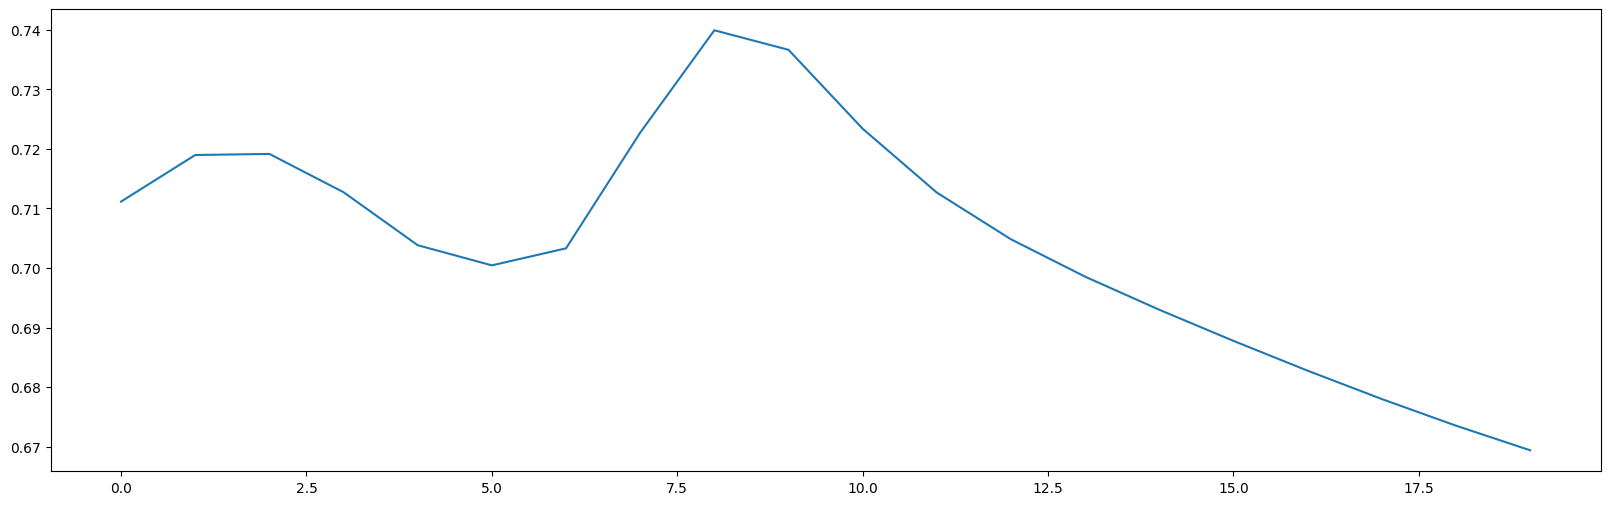

In [68]:
# Entends helps us to fill the missing value with approx value

get_continuous = len(ds_new) - len(lst_output)
get_continuous

ds_new.extend(lst_output)
plt.figure(figsize=(20,6))
plt.plot(ds_new[get_continuous:])

In [69]:
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()
len(final_graph)

5932

In [70]:
sdata_c.STOCK_PRICE.values

array([ 122.480469,  132.110931,  121.542191, ..., 1411.150024,
       1443.900024, 1437.650024])

In [71]:
final_graph

[[122.48046899999999],
 [132.110931],
 [121.542191],
 [111.819138],
 [102.873825],
 [107.03125],
 [98.469139],
 [101.570313],
 [93.953514],
 [94.382813],
 [92.576172],
 [95.625],
 [101.556641],
 [98.690231],
 [105.738281],
 [111.71875],
 [112.8125],
 [114.1875],
 [117.96875],
 [112.578125],
 [115.09375],
 [114.6875],
 [116.40625],
 [122.56250000000001],
 [132.367188],
 [138.75],
 [135.609375],
 [144.140625],
 [155.67109700000003],
 [168.12422200000003],
 [155.93750000000003],
 [155.461716],
 [160.417191],
 [153.75],
 [160.546875],
 [156.09375000000003],
 [143.607025],
 [148.351563],
 [136.499222],
 [133.59375],
 [136.009369],
 [146.889847],
 [158.640625],
 [171.331253],
 [185.037506],
 [199.83984400000003],
 [193.568756],
 [183.092194],
 [182.81250000000003],
 [168.18827800000003],
 [154.733597],
 [151.676559],
 [139.542969],
 [150.706253],
 [162.76249700000002],
 [159.53125],
 [166.76797500000004],
 [163.150787],
 [156.987503],
 [161.610931],
 [151.1875],
 [139.092972],
 [127.96562199

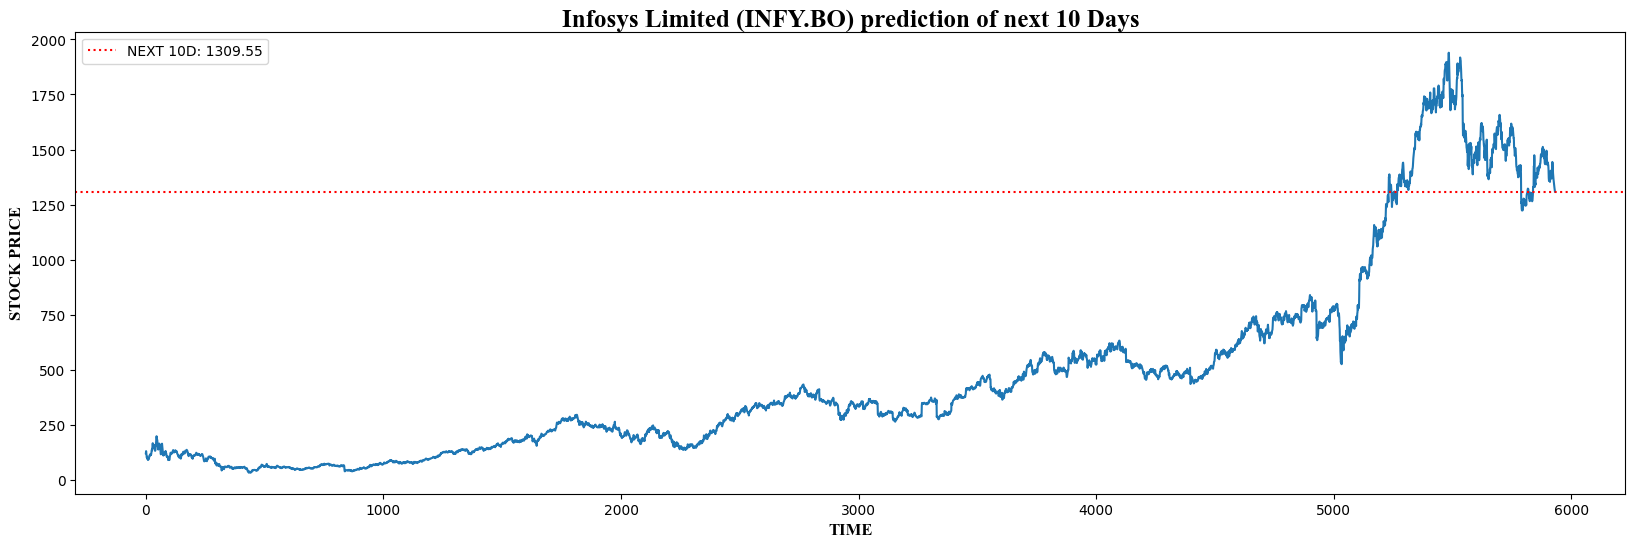

In [72]:
# The yahoo finance ticker for the stock symbol for Infosys
stock_symbol = "Infosys Limited (INFY.BO)"

# Plotting final results with predicted value after the given Duration Days
plt.figure(figsize=(20,6))
plt.plot(final_graph,)
plt.xlabel("TIME", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("STOCK PRICE", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title(f"{stock_symbol} prediction of next {duration} Days", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = f'NEXT {duration}D: {round(float(*final_graph[len(final_graph)-1]),2)}')
plt.legend()
plt.show()

In [73]:
import datetime
final_stock_data = st_data.copy()
final_stock_data['DATE'] = pd.to_datetime(final_stock_data['DATE'], format = '%Y-%m-%d')
final_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5922 entries, 0 to 5921
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         5922 non-null   datetime64[ns]
 1   STOCK_PRICE  5922 non-null   float64       
 2   Indicator    5922 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 138.9+ KB


In [74]:
lst_output

[[0.7233899235725403],
 [0.7126705646514893],
 [0.7048243284225464],
 [0.6985471844673157],
 [0.6929922699928284],
 [0.6877676248550415],
 [0.6827631592750549],
 [0.6780000925064087],
 [0.6735321283340454],
 [0.6693990230560303]]

In [75]:
forecast_list = scaler.inverse_transform(lst_output).reshape(duration)
forecast_list

array([1412.4051941 , 1391.98471513, 1377.03756175, 1365.07954383,
       1354.49737981, 1344.54438198, 1335.01082825, 1325.93714153,
       1317.425628  , 1309.5520238 ])

In [76]:
import datetime
new_forecast = pd.DataFrame(columns=final_stock_data.columns)
new_forecast['STOCK_PRICE'] = forecast_list
new_forecast['Indicator'] = 'forecasted'

# Getting the last row date from 'DATE' column, which can be used to get the start_date and end_date
last_row_date = final_stock_data.DATE.iloc[-1] 
last_row_date = pd.to_datetime(last_row_date, format = '%Y-%m-%d') # Last date of the data frame in formatted
start_date = last_row_date + datetime.timedelta(days=1)

# Adding duration number of days
end_date = start_date + datetime.timedelta(days=duration)

# Adding the new dates to the dataframe new_forecast
new_forecast['DATE']= pd.DataFrame(pd.date_range(start=start_date, end=end_date), columns=['DATE'])
new_forecast

,DATE,STOCK_PRICE,Indicator
0,2023-11-18,1412.405194,forecasted
1,2023-11-19,1391.984715,forecasted
2,2023-11-20,1377.037562,forecasted
3,2023-11-21,1365.079544,forecasted
4,2023-11-22,1354.497380,forecasted
5,2023-11-23,1344.544382,forecasted
6,2023-11-24,1335.010828,forecasted
7,2023-11-25,1325.937142,forecasted
8,2023-11-26,1317.425628,forecasted
9,2023-11-27,1309.552024,forecasted


In [77]:
final_stock_data = pd.concat([final_stock_data, new_forecast], ignore_index=True)
final_stock_data.set_index('DATE',inplace=True)
final_stock_data

,STOCK_PRICE,Indicator
DATE,,
2000-01-03,122.480469,train
2000-01-04,132.110931,train
2000-01-05,121.542191,train
2000-01-06,111.819138,train
2000-01-07,102.873825,train
...,...,...
2023-11-23,1344.544382,forecasted
2023-11-24,1335.010828,forecasted
2023-11-25,1325.937142,forecasted


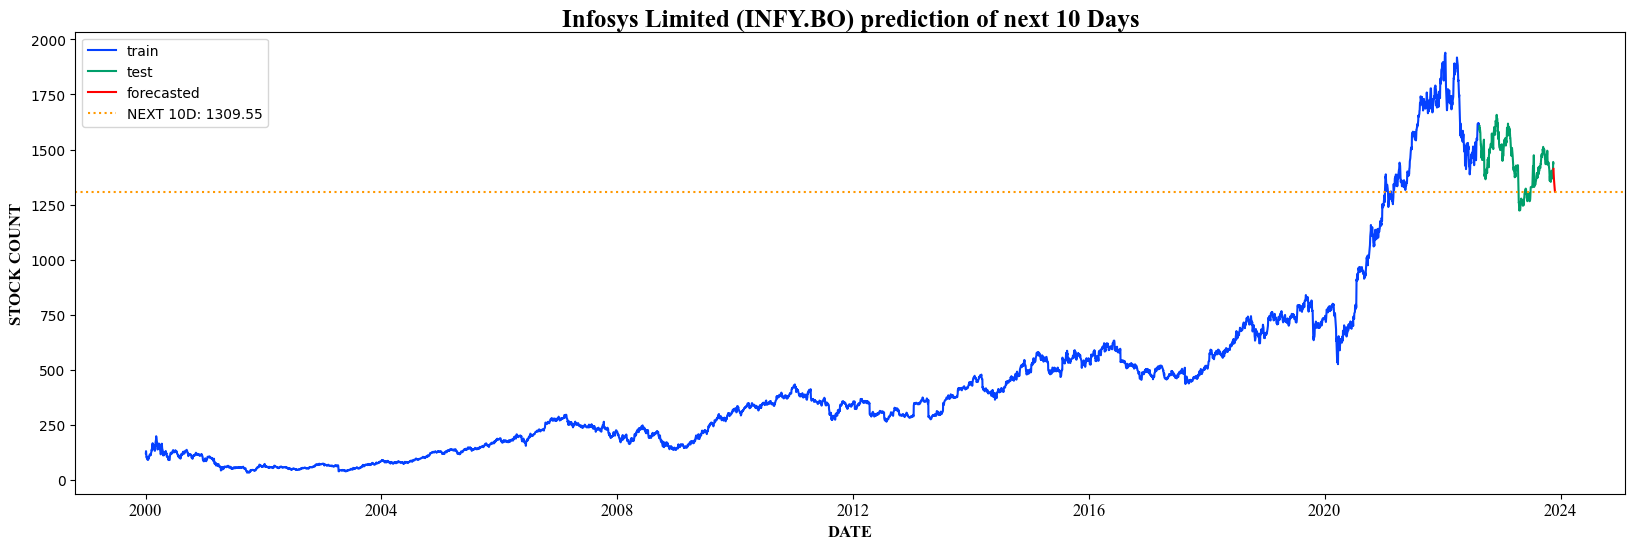

In [78]:
plt.figure(figsize=(20,6))
sns.lineplot(x='DATE', y='STOCK_PRICE', hue='Indicator', palette=['#0541ff','#009f6b','#FF0000'], data=final_stock_data)
plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
plt.xlabel("DATE", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.ylabel("STOCK COUNT", weight='bold', fontfamily = "Times New Roman", size = '12')
plt.title(f"{stock_symbol} prediction of next {duration} Days", verticalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.axhline(y=final_graph[len(final_graph)-1], color = '#ff9900', linestyle = ':', label = f'NEXT {duration}D: {round(float(*final_graph[len(final_graph)-1]),2)}')
plt.legend()
plt.show()

In [79]:
import pickle
pickle.dump(lstm_model, open('lstm_model.pkl', 'wb'))

In [80]:
pickled_lstm_model = pickle.load(open('lstm_model.pkl', 'rb'))
# pickled_model.predict(int(len(data_boxcox)*split_percent), int(len(data_boxcox)*split_percent)+len(arima_test_data)-1)
pickled_lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_19 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
